### COGS 181 - Final Project

# (Title)

<br/>

Yifei Du

<br/>

Dept. of Cognitive Science

University of California San Diego, USA

yid020@ucsd.edu

## Abstract

Character-level recurrent neural networks (char-RNNs) have shown the ability to generate surprisingly coherent text character by character after training, but their performance is highly sensitive to hyperparameters. In this paper, we evaluate and improve a char-RNN model based on Sean Robertson’s open source PyTorch implementation by systematically exploring key hyperparameters<a name=robertsonNote></a>[<sup>[1]</sup>](#Robertson). This paper will experiment with different numbers of RNN layers, hidden state size, the learning rate, and the input sequence length (chunk length) to assess their impact on text generation quality, errors over time, and performance. All comparisons will be compared to the original hyperparameters within the original model. This paper aims to discover hyperparameters and settings that produce more fluent and coherent generated text and improve training efficiency through various datasets.

## 1. Introduction

Recurrent neural networks (RNNs) are a class of neural networks designed for sequential data processing, where the model maintains a hidden state at each iteration, allowing the model to remember past information and recognize patterns over time<a name=karpathynote></a>[<sup>[2]</sup>](#Karpathy). This makes RNNs well suited for tasks such as language modeling, speech recognition, weather forecasting, and more. Anything that has sequential patterns can make great use of RNNs. 


A Character-level recurrent neural network processes text one character at a time, often using networks like LSTM or GRU to help predict the next character in a sequence. When trained on a datasets, a char-RNN can capture the complex structures and patterns the dataset presents. For example, if a dataset of Shakespeare novels were used to train a char-RNN model, then the model would be able to generate text that mimics the style of Shakespeare. 


Since the network only predicts one character at a time, it would have to learn English without any prior knowledge on things like grammar or word/sentence structures. However, char-level RNNs have shown a remarkable ability to capture complex structure, style, and even syntax purely from raw character sequences. 


While char-RNNs are powerful, achieving good performance requires careful tuning of model hyperparameters. RNNs are known to be sensitive to the choice of network size and training parameters. The number of layers and hidden units determines the model’s capacity to represent patterns, a small network may underfit and fail to learn complex patterns, whereas an overly large network may overfit or have high computational cost. The learning rate is another critical hyperparameter, if it’s set too high, training can become unstable, if too low, the network may converge slowly or get stuck in a poor local minimum. Additionally, the sequence length (or “chunk length”) used during training defines how far back the model can learn within each training step – longer chunks provide more context but also make training harder due to longer backpropagation through time. Tuning these hyperparameters is challenging because their effects are interdependent and not always obvious a priority. Karpathy’s “The Unreasonable Effectiveness of Recurrent Neural Networks” describes his initial char-RNN experiments, where even a “baby model” with arbitrarily chosen hyperparameters produced surprisingly valid outputs​<a name=karpathynote></a>[<sup>[2]</sup>](#Karpathy). Suggesting a systematic exploration of hyperparameters is needed to understand their impact on training dynamics and generation quality in char-level RNNs.


## 2. Method

#### 2.1 Data Preprocessing

Our character-level language model follows a standard recurrent neural network approach, where the goal is to predict the next character in a sequence based on previous characters. The model is trained using a plain text file as input. The dataset is read and processed using the function:

`file, file_len = read_file(filename)`

</br>

Each character in the text is assigned an integer index based on a predefined set of printable characters. The dataset is divided into sequences of a fixed length using the function:

`random_training_set(chunk_len, batch_size)`

</br>

This function generates a batch of training samples from the input text. It first selects random chunks of length `chunk_len` from the dataset and converts them into numerical tensor representations.
- It first initializes input and target tensors (inp & target)
- Then it randomly selects batch_size amount of random starting positions in the text
- Then it slices a chunk from the text and, and converting characters into tensor representations
- The input tensor consists of all but the last character, while the target tensor has all but the first (basically shifting one character over for learning)

</br>

### 2.2 Model Definition and Optimization

We would then initialize the recurrent neural network model:

`decoder = CharRNN(n_characters, hidden_size, n_characters, model, n_layers)`

</br>

The model can be either a GRU or LSTM based network depending on the argument, but the one we will be using is GRU. After that, we would initialize the Adam optimizer, which updates the model parameters using backpropagation based on the computed gradients and learning rate and the loss function, which measures the difference between predicted character probabilities and the ground truth character indices:

`decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=args.learning_rate)`

`criterion = nn.CrossEntropyLoss()`

</br>

### 2.3 Training Process

The `train(inp, target)` function performs one training step using backpropagation:
- First it initializes the hidden state of the RNN
- It then performs a forward pass through the model, iterating over each character in the input sequence.
- The output is compared against the target values using the cross-entropy loss function.
- __Backpropagation through time (BPTT)__: since RNNs maintain hidden states over sequential steps, gradients are computed and propagated backwards through all time steps in the input sequence.
- The loss is then back propagated, and the optimizer updates the model’s weights.
- `train()` then returns the average loss per character for monitoring the training process

</br>

### 2.4 Loss Analysis and Visualization

During training, the model is evaluated using different hyperparameter settings. For each training run, the script records the total training time and saves it along with the corresponding hyperparameters in a .csv file. In addition, the model logs the error per epoch to track performance over time. This evaluation process involves recording the time taken to complete training given the hyperparameters and monitoring the loss per epoch to evaluate the model’s performance and stability.


## Experiment

In this section, we will discuss the data collected during the training process, including recorded training times, hyperparameter variations, and loss values over epochs. The experiment involves multiple training runs with different hyperparameter configurations to assess their impact on model performance. If a hyperparameter isn't being tested, they will be set to the default that was built into the code.

</br>

#### RNN Layers

The graphs below tells us that as the number of RNN layers increase, the longer it takees to train the model. Roughly about 4-5 minutes per additional layer. The error graph shows that all of the different `n_layers` converges to roughly the same place except for when there is only 1 RNN layer, which is slightly worse. This suggests that having 2 RNN layers would be the best for this model as its training error is pretty much the same as when there is more layers, but it takes significantly less time to train.

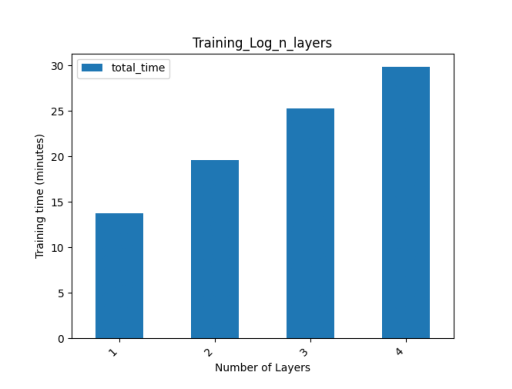

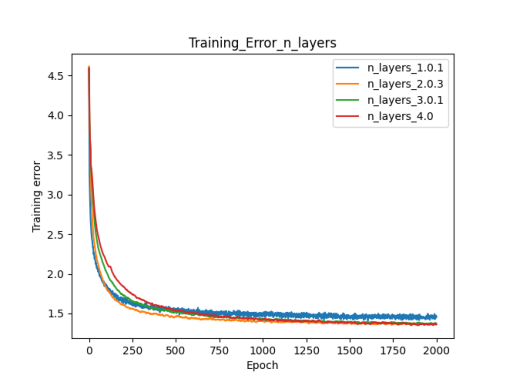

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('imgs/Training_Log_n_layers.png')
img2 = mpimg.imread('imgs/Training_Error_n_layers.png')

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

#### Hidden State Size

Based on our experiment the time it takes to train the model incraeses as the hidden state size increases, it especially jumps up by around 6-7 minutes between 100 and 150. The data also tells us that training error for a hidden size of 150 and 200 convereges the lowest, with 100 not far behind and 50 as the worst. This suggests that having a hidden size of 100 or 150 would be the best as one has a better error convergence but worse training time, while the other has significantly less training time but has a 

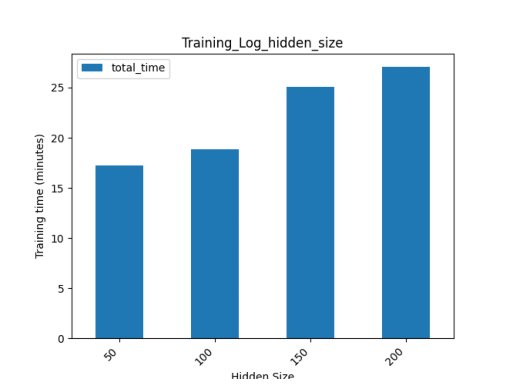

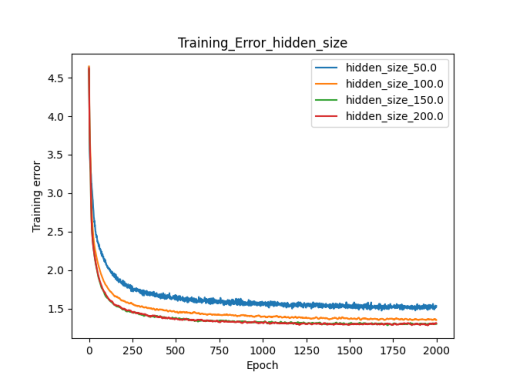

In [6]:
img1 = mpimg.imread('imgs/Training_Log_hidden_size.png')
img2 = mpimg.imread('imgs/Training_Error_hidden_size.png')

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

#### Learning Rate


Based on our experiment, the training time does increase as the learning rate increases, but not by much. The training error curve shows that when the learning rate is high, the convergence becomes much worse, and it also becomes somewhat unstable. The best learning rate in this case would be 0.005 or 0.01 as their error convergence and training time is about the same, with 0.005 being slightly better. Note that the instability should actually be even higher because we already smoothed out the training error curves.

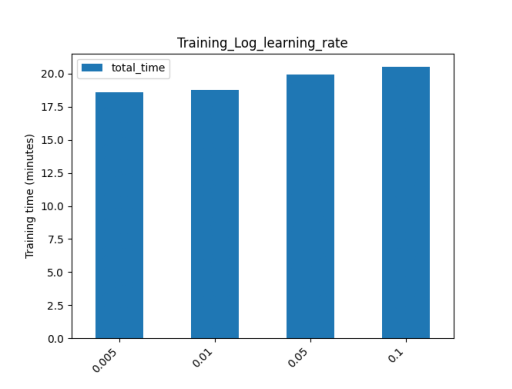

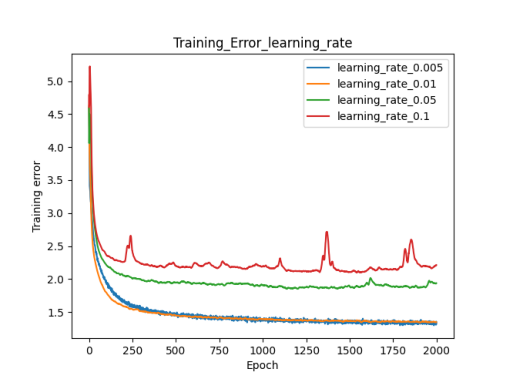

In [14]:
img1 = mpimg.imread('imgs/Training_Log_learning_rate.png')
img2 = mpimg.imread('imgs/Training_Error_learning_rate.png')

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

#### Chunk Length

Our experiments show how the training time significantly increases as the length of the chunks increases, which is honestly pretty intuitive. The error graph shows how the model's error convergence slightly improves when the chunk length increases, although not by a lot. Because of how close the errors converge and how much chunk length affects the training time, it's difficult to decide which chunk length is the best in this case.

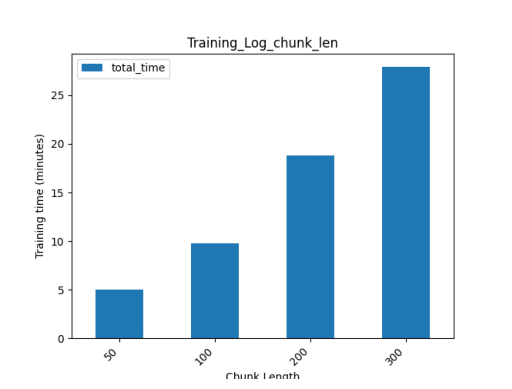

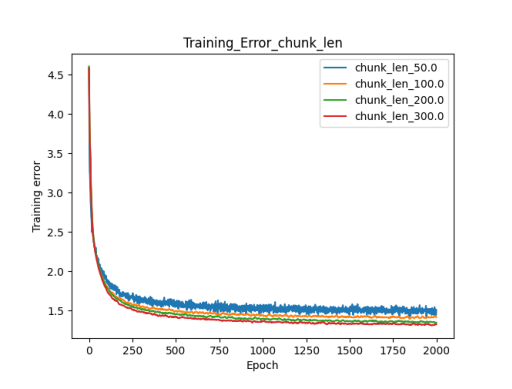

In [ ]:
img1 = mpimg.imread('imgs/Training_Log_chunk_len.png')
img2 = mpimg.imread('imgs/Training_Error_chunk_len.png')

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()


## Conclusion

## References

<a name="robertsonNote"></a>1: Robertson, S. (2017). *char-rnn.pytorch: PyTorch implementation of char-rnn (character-level language model)*. GitHub repository. Retrieved from [https://github.com/spro/char-rnn.pytorch](https://github.com/spro/char-rnn.pytorch).<br>

<a name="karpathynote"></a>2: Karpathy, A. (2015). *The Unreasonable Effectiveness of Recurrent Neural Networks*. Retrieved from [http://karpathy.github.io/2015/05/21/rnn-effectiveness/](http://karpathy.github.io/2015/05/21/rnn-effectiveness/).<br>